In [1]:
import pandas as pd
import os
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline  

#### Load data.

Keep each animal's session datafiles in an "experiment" folder - one folder for each animal.

In [2]:
source_dir = '/nas/volume1/behavior/data/mworks-data/head_fixed'  # Full path to data folder.
experiment = 'LED'                                                # Name of Experiment folder.
data_dir = os.path.join(source_dir, experiment)                   # Create full path combining data "source" folder and particular "experiment" folder.
animals = os.listdir(data_dir)                                    # The experiment folder contains folders that are named for each animal that is part of this experiment.
print "Animals: ", animals
A = dict((animal, dict()) for animal in animals)                  # Initialize a python-dict that will store all animals' and all sessions' info.

Animals:  ['Minerva', 'Juno', 'Athena', 'Hera']


In [3]:
# First look at 1 animal. 
# Python uses 0-indexing, so to get the 1st animal in our list of "animals" above, use 0:
current_animal = animals[0]
print "Current animal: ", current_animal

# For simplicity, create the full path to the folder containing all of current_animal's datafiles.
current_animal_dir =os.path.join(data_dir, current_animal)

# Get a list of all the items in the current_animal's datafile folder.
runs = os.listdir(current_animal_dir)
print "Found %i run(s)." % len(runs)

# Initiate a python-dict that will contain info for all sessions of current_animal.
data = dict((i, dict()) for i in range(len(runs)))

Current animal:  Minerva
Found 2 run(s).


In [5]:
# Now, look at 1 session's data for current_animal:
current_run_idx = 0
current_run = runs[current_run_idx]
print "Reading data from: ", current_run

df = pd.read_table(os.path.join(current_animal_dir, current_run), sep='\t ')

Reading data from:  Minerva60minnoautoreward2noretry_serial_data_20170801124517358216.txt


/home/juliana/anaconda/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [6]:
# Get all the column names (these are the variables saved from the Arduino sketch):
variables = df.columns.values
print "Variable names: ", variables

Variable names:  ['currtime' 'trialnum' 'lefttrial' 'tstart' 'sensorvalue1' 'tsensorvalue1'
 'sensorvalue2' 'tsensorvalue2' 'rewardport1' 'rewardport2' 'treward'
 'correctresponse' 'correctport' 'tend' 'auto_reward' 'allow_retry']


In [7]:
# This is what the data looks like in table-form:
df

,currtime,trialnum,lefttrial,tstart,sensorvalue1,tsensorvalue1,sensorvalue2,tsensorvalue2,rewardport1,rewardport2,treward,correctresponse,correctport,tend,auto_reward,allow_retry
0,0,0,0,0,0,0,0,8,9,0,0,0,0,0,0,NaN
1,2449636,1,0,1952164,0,2449624,0,2449628,8,9,1991300,1,9,0,0,0.0
2,2949236,1,0,1952164,0,2949224,0,2949228,8,9,1991300,1,9,0,0,0.0
3,3450084,1,0,1952164,0,3450072,1023,3450076,8,9,1991300,1,9,0,0,0.0
4,3949620,1,0,1952164,0,3949608,1023,3949612,8,9,1991300,1,9,0,0,0.0
5,4449300,1,0,1952164,0,4449264,1023,4449268,8,9,1991300,1,9,0,0,0.0
6,4950144,1,0,1952164,0,4950120,0,4950124,8,9,1991300,1,9,0,0,0.0
7,5450832,1,0,1952164,0,5450808,0,5450812,8,9,1991300,1,9,0,0,0.0
8,5950728,1,0,1952164,0,5950704,0,5950708,8,9,1991300,1,9,0,0,0.0
9,6450356,1,0,1952164,0,6450328,1023,6450332,8,9,1991300,1,9,0,0,0.0


In [8]:
# As an example, first get all the time-stamps:
tstamps = df.loc[:, 'currtime']    # Get all rows from the column 'currtime'

# Sometimes, there may be weird "NaNs" so we should get rid of rows containing invalid time-stamps.
# Another time of invalid timestamp is 0, this is likely the very first write-to-file event before the trials begin.
nans = [i for i,t in enumerate(tstamps) if math.isnan(t) or t==0]    # Find the indices of those rows with tstamp value that is 'nan'
tstamps = [t for i,t in enumerate(tstamps) if i not in nans]         # Rewrite the variable "tstamps" so that it only contains NON-nan values
print "Found %i time stamps for data. First tstamp is %i. Removed %i nans." % (len(tstamps), tstamps[0], len(nans))

# Use the indices of rows containg 'NaNs' (stored in the variable "nans") to drop the FULL row (i.e., all columns).
if len(nans)>0:
    df = df.drop(nans)
    print "Removed data with NaN t-stamp."

Found 7209 time stamps for data. First tstamp is 2449636. Removed 1 nans.
Removed data with NaN t-stamp.


In [9]:
# Now, our data table should have those NaNs removed:
df

,currtime,trialnum,lefttrial,tstart,sensorvalue1,tsensorvalue1,sensorvalue2,tsensorvalue2,rewardport1,rewardport2,treward,correctresponse,correctport,tend,auto_reward,allow_retry
1,2449636,1,0,1952164,0,2449624,0,2449628,8,9,1991300,1,9,0,0,0.0
2,2949236,1,0,1952164,0,2949224,0,2949228,8,9,1991300,1,9,0,0,0.0
3,3450084,1,0,1952164,0,3450072,1023,3450076,8,9,1991300,1,9,0,0,0.0
4,3949620,1,0,1952164,0,3949608,1023,3949612,8,9,1991300,1,9,0,0,0.0
5,4449300,1,0,1952164,0,4449264,1023,4449268,8,9,1991300,1,9,0,0,0.0
6,4950144,1,0,1952164,0,4950120,0,4950124,8,9,1991300,1,9,0,0,0.0
7,5450832,1,0,1952164,0,5450808,0,5450812,8,9,1991300,1,9,0,0,0.0
8,5950728,1,0,1952164,0,5950704,0,5950708,8,9,1991300,1,9,0,0,0.0
9,6450356,1,0,1952164,0,6450328,1023,6450332,8,9,1991300,1,9,0,0,0.0
10,6950948,1,0,1952164,0,6950920,1023,6950924,8,9,1991300,1,9,0,0,0.0


#### Make a histogram

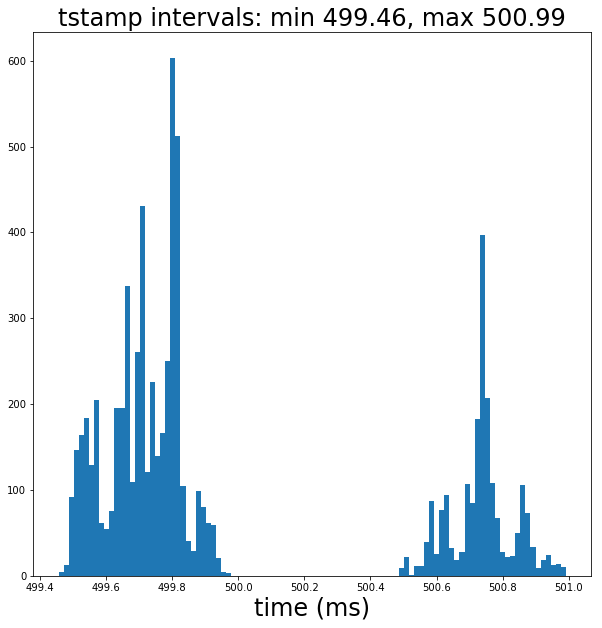

In [12]:
# Look at the intervals between time-stamps.
# We know that we are grabbing data every N ms (and using Arduino's micros() function to get the current times).
# Hopefully, most of the time-stamp intervals will be near N ms long.

data_intervals = np.diff(tstamps)/1000.    # Get the difference between each value and it's previous value.
fig = plt.figure(figsize=(10,10))          # Initialize a figure with a certain size (W, H)
ax = fig.add_subplot(1,1,1)                # Create a single subplot to the figure to draw into
ax.hist(data_intervals, bins=100)         # Plot a histogram of data_intervals using 1000 bins.

# Add a title and labels for the axes:
title = "tstamp intervals: min {:04.2f}, max {:04.2f}".format(min(data_intervals), max(data_intervals))
ax.set_title(title, fontsize=24)
ax.set_xlabel('time (ms)', fontsize=24)

#### Get indices in our data-table for each unique TRIAL.
Since we are sampling the current state of all variables at every N ms intervals, we probably have many more rows than we do trials.
In other words, each "trial" has multipe rows of information relating to it.

In [13]:
# Parse trials by trialnum:
trialnums = df.loc[:, 'trialnum']                             # Grab all rows under the column called "trialnum"                              
trials, trial_idxs = np.unique(trialnums, return_index=True)  # Get unique trial values (trials) and the index of their first occurrence (trial_idxs) in our data-table.
print "Found trials %i through %i." % (trials[0], trials[-1])  # Check the 1st trial number (For indexing, remember 0 is first, 1 is second, etc.), and also the last (-1 is the last item, -2 is the second to last item, etc.)

Found trials 1 through 424.


### Trial Indexing.

#### "trial_idxs" go from 0-->nrows. "trials" go from 1-->ntrials.  DF is indexed by "row" value, i.e., 1,2,3,4...nrows.

To index df rows using "trials" as indices into "trial_idxs":   
1. Subtract 1 from "trials" value (i.e., to index the 1st index of "trial_idx", we need to use index=0, but "trials" starts at 1.   
2.  Add 1 to get the proper "row" value for DF, since "trial_idxs" are indices of DF, not DF's row values.

In [14]:
# Get trial numbers for "left" trials:
left_trial_idxs = [t for t in trials if df.loc[trial_idxs[t-1]+1, 'lefttrial']==1]
print "first 10 left idxs: ", left_trial_idxs[0:10]

# Get trial numbers for "right" trials:
right_trial_idxs = [t for t in trials if df.loc[trial_idxs[t-1]+1, 'lefttrial']==0]
right_trial_idxs[0:10]
print "first 10 right idxs: ", right_trial_idxs[0:10]

nleft = len(left_trial_idxs)
nright = len(right_trial_idxs)
ntrials = len(trials)
print "N left (%i) + N right (%i) = %i trials total." % (nleft, nright, ntrials)

first 10 left idxs:  [3, 5, 6, 7, 9, 11, 13, 14, 16, 19]
first 10 right idxs:  [1, 2, 4, 8, 10, 12, 15, 17, 18, 22]
N left (205) + N right (219) = 424 trials total.


In [15]:
# Get percent correct overall:
correct_trial_idxs = []
correct_left_trials = []
correct_right_trials = []
for tstart in trials:
    if tstart==trials[-1]:
        correct_trial = np.any(df.loc[trial_idxs[tstart-1]+1:, 'correctresponse'])
    else:
        correct_trial = np.any(df.loc[trial_idxs[tstart-1]+1:trial_idxs[tstart], 'correctresponse'])
    if correct_trial:
        correct_trial_idxs.append(tstart)

        # Also, sort out left vs. right trials:
        if df.loc[trial_idxs[tstart-1]+1, 'lefttrial']==1:
            correct_left_trials.append(tstart)
        else:
            correct_right_trials.append(tstart)
        
overall_correct_percent = float(len(correct_trial_idxs))/float(ntrials)
print "Over percent correct: ", overall_correct_percent
print "Correct LEFT trials: {0:.2f}%".format(float(len(correct_left_trials))/float(nleft))
print "Correct RIGHT trials: {0:.2f}%".format(float(len(correct_right_trials))/float(nright))

Over percent correct:  0.695754716981
Correct LEFT trials: 0.58%
Correct RIGHT trials: 0.81%


In [16]:
# Check licks:
threshold = 1000
licksensor1 = df.loc[:, 'sensorvalue1']; licksensor1 = np.array([l for l in licksensor1 if not math.isnan(l)])
licksensor2 = df.loc[:, 'sensorvalue2']; licksensor2 = np.array([l for l in licksensor2 if not math.isnan(l)])
t_licksensor1 = df.loc[:, 'tsensorvalue1']; t_licksensor1 = np.array([l for l in t_licksensor1 if not math.isnan(l)])
t_licksensor2 = df.loc[:, 'tsensorvalue2']; t_licksensor2 = np.array([l for l in t_licksensor2 if not math.isnan(l)])

# Put time relative to start of session:
t_licksensor1 = (t_licksensor1 - tstamps[0]) / 1E6
t_licksensor2 = (t_licksensor2 - tstamps[0]) / 1E6
                 
# Find indices of licking events:
left_licks = np.array([i for i,val in enumerate(licksensor1) if val>=threshold])
right_licks = np.array([i for i,val in enumerate(licksensor2) if val>=threshold])

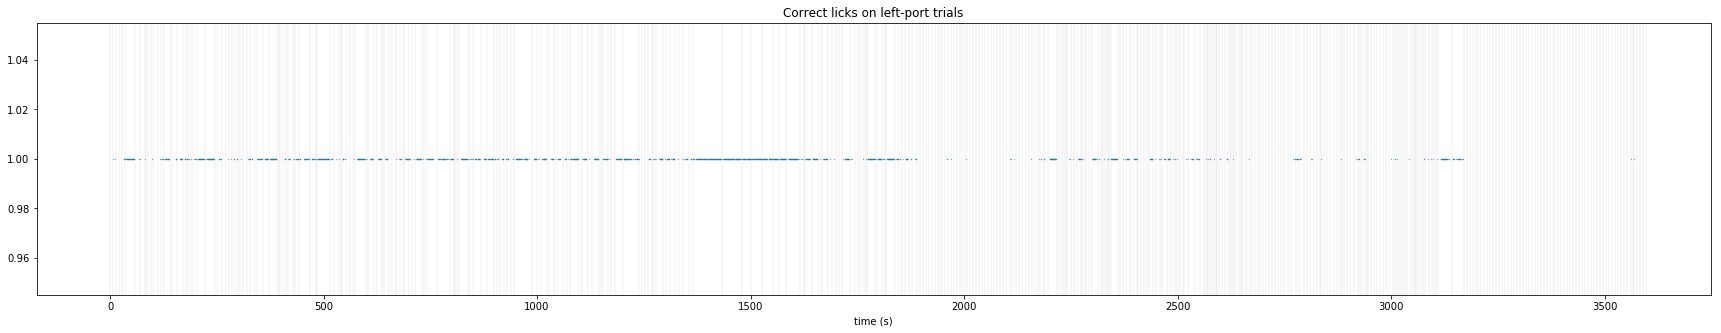

In [20]:
# Plot correct LEFT licking events for the whole session:
correct_left_licks = [trial_idxs[t-1]+1 for t in correct_left_trials]
plt.figure(figsize=(30,5))
plt.plot(t_licksensor1[left_licks], np.ones(len(left_licks)), '.', markersize=0.5)

# Also plot trial starts as vertical lines:
tstamps = np.array(tstamps)
trial_start_times = (tstamps[np.array([i for i in trial_idxs])] - tstamps[0]) / 1E6
for tstart in trial_start_times:
    plt.axvline(x=tstart, color='k', linestyle='-', alpha=0.6, linewidth=0.1)

plt.title('Correct licks on left-port trials')
plt.xlabel('time (s)')

In [21]:
# Create a python dictionary of 'key'-'value' pairs
# There are as many keys in the dictionary "trialdict" as there are trials.
# In this way, we can store all the info about a given trial and access all that info just by using the correct trial "key"

trialdict = dict()
for t in trials:
    trialdict[t] = dict()
    trialdict[t]['start'] = tstamps[trial_idxs[t-1]]
    if t==trials[-1]:
        trialdict[t]['end'] = tstamps[-1]
    else:
        trialdict[t]['end'] = tstamps[trial_idxs[t]-1]
        
    curr_trialidxs = [i for i in list(df.index) if df.loc[i, 'currtime']>=trialdict[t]['start'] and df.loc[i, 'currtime']<=trialdict[t]['end']]
    trialdict[t]['data_idxs'] = curr_trialidxs
    trialdict[t]['lickport1'] = [df.loc[i, 'sensorvalue1'] for i in curr_trialidxs]
    trialdict[t]['lickport2'] = [df.loc[i, 'sensorvalue2'] for i in curr_trialidxs]
    trialdict[t]['t_lickport1'] = [df.loc[i, 'tsensorvalue1'] for i in curr_trialidxs]
    trialdict[t]['t_lickport2'] = [df.loc[i, 'tsensorvalue2'] for i in curr_trialidxs]

    trialdict[t]['leftside'] = df.loc[trial_idxs[t-1]+1, 'lefttrial']
    if t in correct_trial_idxs:
        trialdict[t]['correct'] = 1
    else:
        trialdict[t]['correct'] = 0

In [24]:
# Save all session info in a dictionary for this animal:
import cPickle as pkl

# Store all the session "summary" info (like how many trials, how many left/right, number correct, etc.):
data[current_run_idx]['animal'] = current_animal
data[current_run_idx]['session'] = runs[current_run_idx]
data[current_run_idx]['ntrials'] = ntrials
data[current_run_idx]['nleft'] = nleft
data[current_run_idx]['nright'] = nright
data[current_run_idx]['ncorrect'] = len(correct_trial_idxs)
data[current_run_idx]['ncorrect_left'] = len(correct_left_trials)
data[current_run_idx]['ncorrect_right'] = len(correct_right_trials)

# Also add an element to this session's dictionary that contains all the parsed trial info:
data[current_run_idx]['trials'] = trialdict

# Check of the save directory/folder exists.  If not, make it:
output_dir = os.path.join(current_animal_dir, 'output')
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# Create a filename and save this "data" dictionary to it.
# NOTE:  By saving the animal's session info in this way, we can re-access it later to add more sessions to it.
# SO far, we only looked at whichever run is "current_run" -- for each new run (i.e,. each time we run a session),
# we can load the previously saved file, create a NEW "current_run" key, and add that to this "data" dictionary.
# In this case, each key of the dictionary is a different session.
animal_fn = os.path.join(output_dir, '%s_sessiondata.pkl' % current_animal)
with open(animal_fn, 'wb') as f:
    pkl.dump(data, f)


In [28]:
# We can also add the session data for this animal to a massive "ALL ANIMALS" dictionary:
A[current_animal] = data
A.keys()

['Minerva', 'Hera', 'Juno', 'Athena']

In [29]:
performance = dict((a, dict()) for a in A.keys())
for a in A.keys():
    performance[a]['correct'] = float(A[a][current_run_idx]['ncorrect'])/float(A[a][current_run_idx]['ntrials'])
    performance[a]['ntrials'] = float(A[a][current_run_idx]['ntrials'])

for a in A.keys():
    print a, performance[a]


KeyError: 0

In [30]:
performance

{'Athena': {},
 'Hera': {},
 'Juno': {},
 'Minerva': {'correct': 0.6957547169811321, 'ntrials': 424.0}}

In [31]:
import  matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = ['sans']

def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

In [32]:
trial_durs = [trialdict[t]['end'] - trialdict[t]['start'] for t in trialdict.keys()]
longest_trial = trial_durs.index(max(trial_durs))
max_datapoints = len(trialdict[longest_trial+1]['data_idxs'])

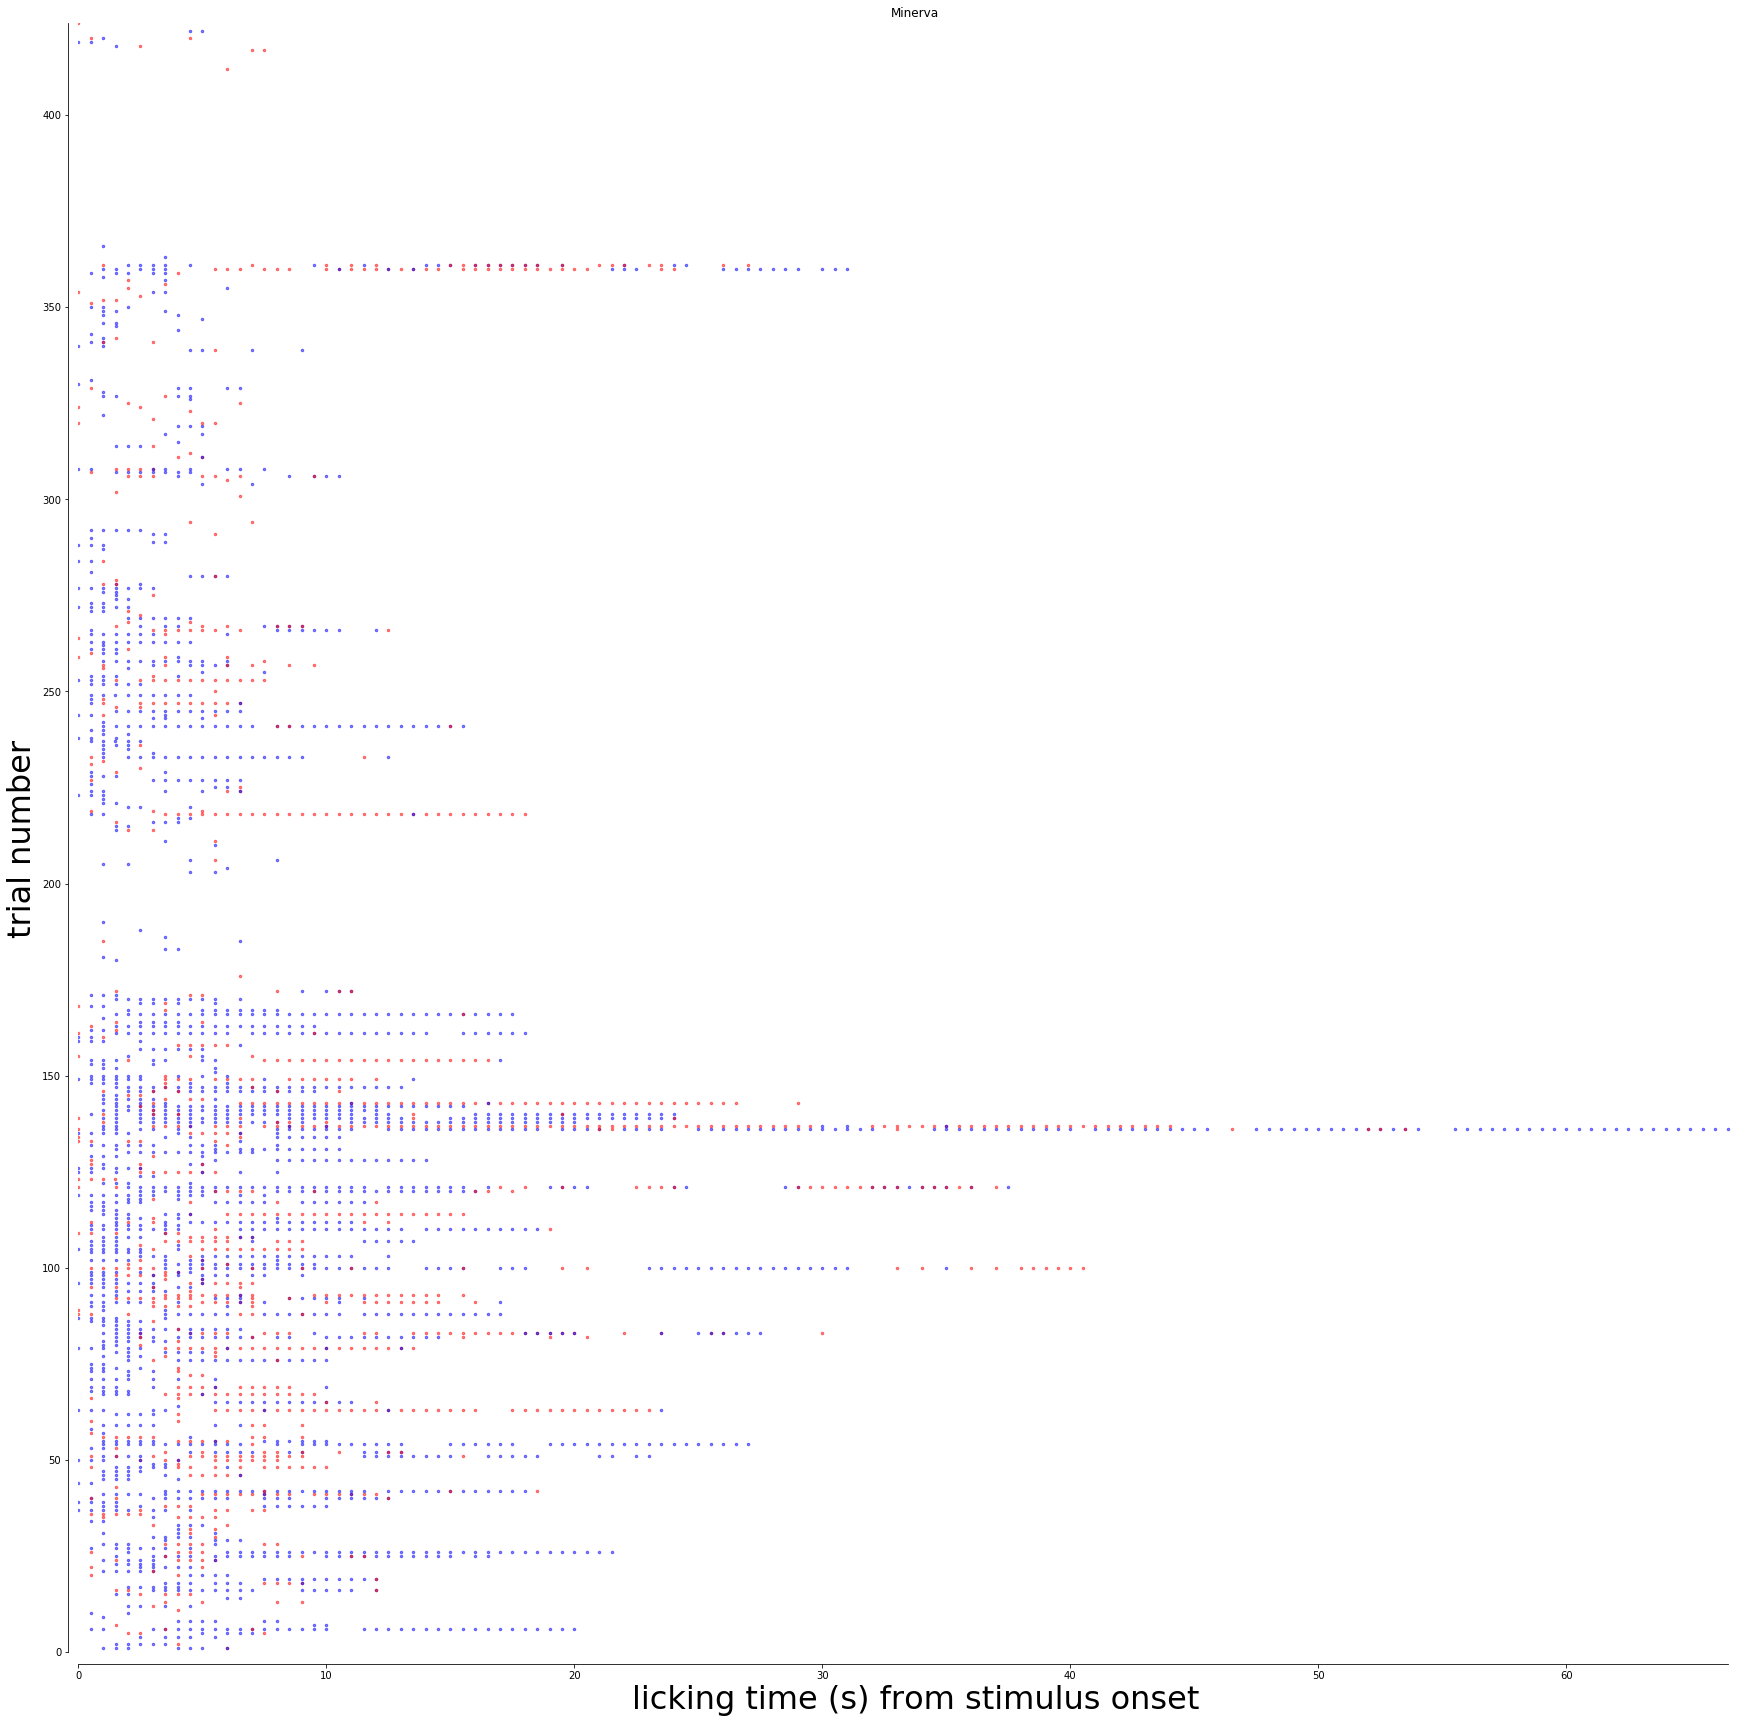

In [33]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1)

for t in trialdict.keys():
    leftlicking = False; rightlicking = False
    port1 = np.array([int(i) for i,val in enumerate(trialdict[t]['lickport1']) if val>=threshold])
    if len(port1)>0:
        t_port1 = np.array(trialdict[t]['t_lickport1'])[port1]
        leftlicking = True
    
    port2 = np.array([i for i,val in enumerate(trialdict[t]['lickport2']) if val>=threshold])
    if len(port2)>0:
        t_port2 = np.array(trialdict[t]['t_lickport2'])[port2]
        rightlicking = True
        
    if trialdict[t]['leftside']==1:
        left_alpha = 0.5
        right_alpha = 0.5
        left_color = 'b'
        right_color = 'r'
    else:
        left_alpha = 0.5
        right_alpha = 0.5
        left_color = 'r'
        right_color = 'b'
    
    if leftlicking:
        ax.plot((t_port1-trialdict[t]['start'])/1E6, np.ones(len(t_port1))*t, '.', markersize=5, color=left_color, alpha=left_alpha)
    if rightlicking:
        ax.plot((t_port2-trialdict[t]['start'])/1E6, np.ones(len(t_port2))*t, '.', markersize=5, color=right_color, alpha=right_alpha)
    
ax.set_ylim([-0.5, ntrials])
ax.set_xlim([0, (trialdict[longest_trial+1]['end']-trialdict[longest_trial+1]['start'])/1E6])
ax.set_xlabel('licking time (s) from stimulus onset', fontsize=32)
ax.set_ylabel('trial number', fontsize=32)
adjust_spines(ax, ['left', 'bottom'])
ax.set_title('%s' % current_animal)

In [34]:
(trialdict[longest_trial+1]['end']-trialdict[longest_trial+1]['start'])/1E6

67.500152